# What is sentiment analysis?
Sentiment analysis is a technique that detects the underlying sentiment in a piece of text.
It is the process of classifying text as either positive, negative, or neutral. Machine learning techniques are used to evaluate a piece of text and determine the sentiment behind it.

## Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

## Loding Dataset

In [10]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Now, we will take a look at the variable “Score” to see if majority of the customer ratings are positive or negative.

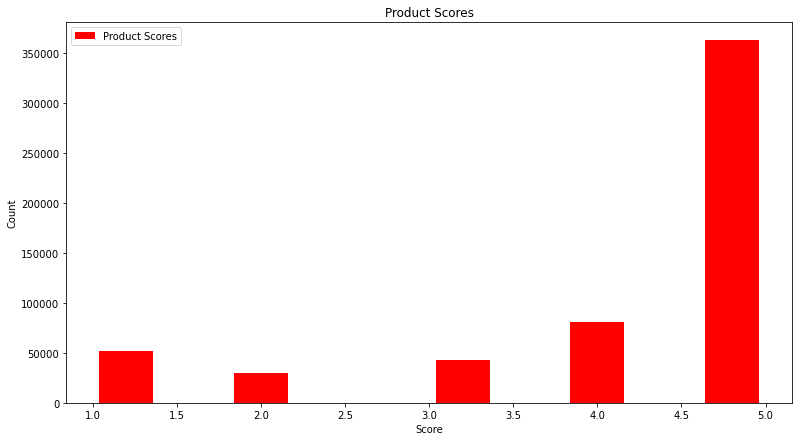

In [28]:
plt.figure(figsize=(13,7))
plt.hist(data=df,x='Score', rwidth=0.8, orientation='vertical' , color="r", label="Product Scores")
plt.title("Product Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend(loc=0)
plt.show()

## Now, we can create some wordclouds to see the most frequently used words in the reviews.

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud 

##  Word cloud

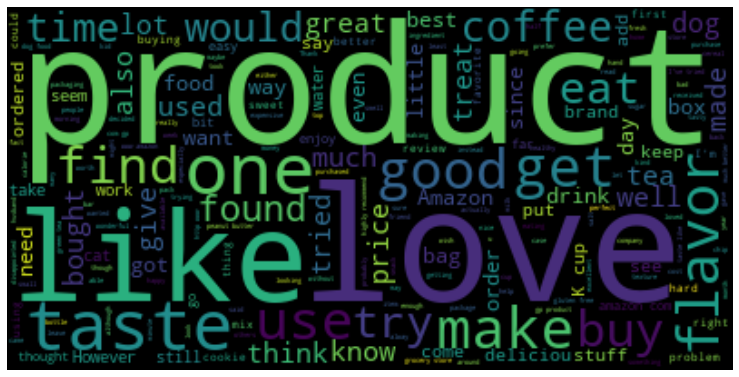

In [77]:
# Create stopword list:
plt.figure(figsize=(13,7))
stopwords = set(stopwords.words("english"))
stopwords.update(["br", "href"]) # it will add these word
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Classifying Tweets

In this step, we will classify reviews into “positive” and “negative,” so we can use this as training data for our sentiment classification model.

In [82]:
df['sentiment']=df['Score'].apply(lambda x : +1 if x>=3 else -1)

In [85]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [84]:
df['sentiment'].value_counts()

 1    486417
-1     82037
Name: sentiment, dtype: int64

In [96]:
positive=df[df['sentiment']==1]
negative=df[df['sentiment']==-1]

In [105]:
positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1


In [106]:
negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,-1
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-1
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1


## Word Cloud for Positive reviews

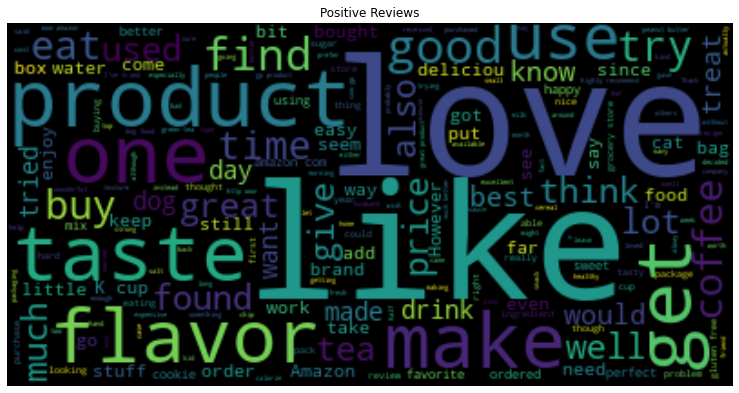

In [104]:
plt.figure(figsize=(13,7))
positive_text = " ".join(review for review in positive.Text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(positive_text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")
plt.show()

## Word Cloud for Negative reviews

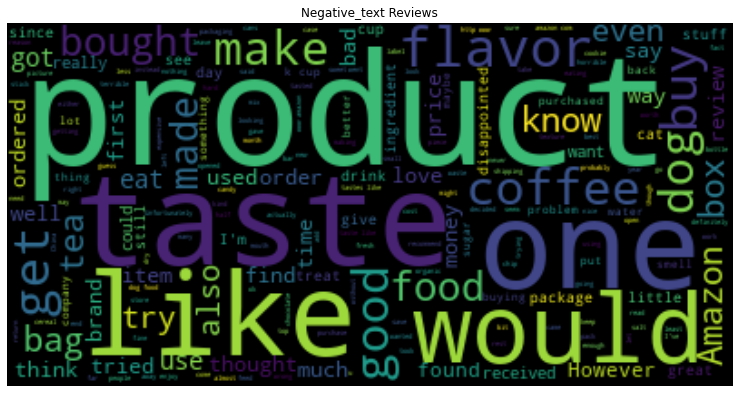

In [107]:
plt.figure(figsize=(13,7))
negative_text = " ".join(review for review in negative.Text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(negative_text)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('Negative_text Reviews')
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
plt.hist(data=df,x='Score', rwidth=0.8, orientation='vertical' , color="r", label="Product Scores")
plt.title("Product Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend(loc=0)
plt.show()

In [137]:
df['sentiment_text']=df['sentiment'].apply(lambda y : 'positive' if y==1 else 'negative')

In [138]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,sentiment_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,positive


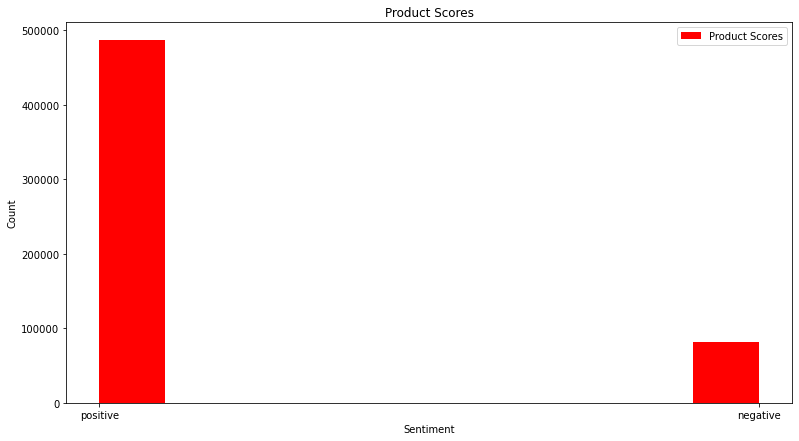

In [140]:
plt.figure(figsize=(13,7))
plt.hist(data=df,x='sentiment_text', orientation='vertical' , color="r", label="Product Scores")
plt.title("Product Scores")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(loc=0)
plt.show()

## Building the Model

Finally, we can build the sentiment analysis model!
This model will take reviews in as input. It will then come up with a prediction on whether the review is positive or negative.
This is a classification task, so we will train a simple logistic regression model to do it.
For reference, take a look at the data frame again:

<b>Data Cleaning</b></br>
We will be using the summary data to come up with predictions. First, we need to remove all punctuation from the data.

In [144]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

C:\Users\Bilal\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
df1=df[['Summary','sentiment']]
df1.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1


In [151]:
X=df1['Summary']
y=df1['sentiment']

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [157]:
y_test

422752    1
55768     1
200408    1
123087    1
314876    1
         ..
190306    1
169621    1
531301    1
80894     1
524088    1
Name: sentiment, Length: 113686, dtype: int64

In [159]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

In [160]:
train_matrix

<454741x33215 sparse matrix of type '<class 'numpy.int64'>'
	with 1863999 stored elements in Compressed Sparse Row format>

In [161]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [162]:
X_train = train_matrix
X_test = test_matrix

In [163]:
lr.fit(X_train,y_train)

C:\Users\Bilal\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [164]:
predictions = lr.predict(X_test)

In [169]:
predictions

array([ 1,  1,  1, ..., -1,  1,  1], dtype=int64)

In [171]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 9408,  3044],
       [ 7173, 94061]], dtype=int64)

In [172]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.57      0.76      0.65     12452
           1       0.97      0.93      0.95    101234

    accuracy                           0.91    113686
   macro avg       0.77      0.84      0.80    113686
weighted avg       0.92      0.91      0.92    113686



In [175]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df2.head(25)

,Actual,Predicted
422752,1,1
55768,1,1
200408,1,1
123087,1,1
314876,1,1
401505,1,1
183307,1,1
138719,1,1
517146,1,1
528470,1,1
